In [30]:
import numpy as np
from scipy.fftpack import fft

import IPython.display as ipd
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [31]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])
    
    return xf, vals

In [32]:
# import os
# os.listdir(train_audio_path)

data_dir = '../train/'
train_audio_path = data_dir + 'audio/'

dirs = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
fft_all = []
names = []

In [33]:
for direct in dirs:
    waves = [f for f in os.listdir(train_audio_path+direct) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path+direct+'/'+wav)
        if samples.shape[0] != sample_rate:
            samples = np.append(samples, np.zeros((sample_rate - samples.shape[0],)))
        x, val = custom_fft(samples, sample_rate)
        fft_all.append(val)
        names.append(direct + '/' + wav)

In [34]:
fft_all = np.array(fft_all)

In [35]:
fft_all = (fft_all - np.mean(fft_all, axis=0)) / np.std(fft_all, axis=0)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fft_all = pca.fit_transform(fft_all)

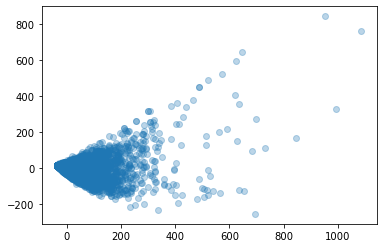

In [37]:
plt.scatter(x=fft_all[:,0], y=fft_all[:,1], alpha=0.3)

In [38]:
for i in np.where(fft_all[:,0] > 800)[0]:
    print(names[i])

yes/5165cf0a_nohash_0.wav
yes/617de221_nohash_1.wav
yes/e4b02540_nohash_0.wav
stop/de41f895_nohash_1.wav
